In [1]:
import pandas as pd   # used to load dataset to pandas dataframe
import numpy as np    # used to create an array
import seaborn as sns        # used for advanced statistical plots which we have used in EDA section
import pickle          # used to covert our model into bite stream
import matplotlib.pyplot as plt   # used to plot low level graph
from sklearn.preprocessing import LabelEncoder

# UPLOADING DATASET

In [69]:
df= pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\data science projects\Loan_Prediction_using_Flask\loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.shape

(614, 13)

# Exploratory data analysis (EDA):

In [5]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

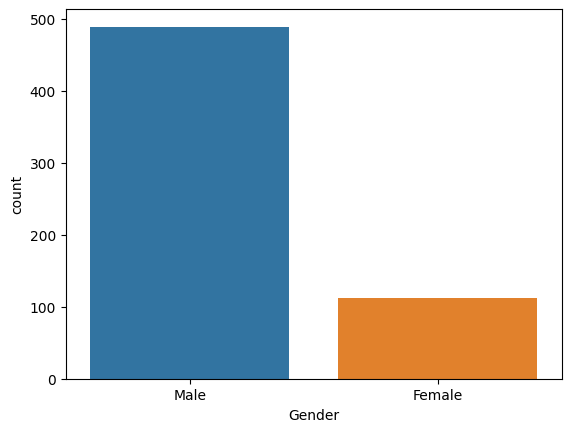

In [6]:
sns.countplot(x='Gender',data=df)

In [7]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

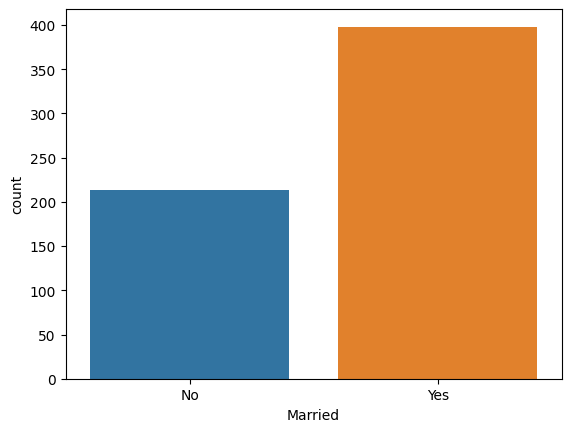

In [8]:
sns.countplot(x='Married',data=df)

In [9]:
df.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

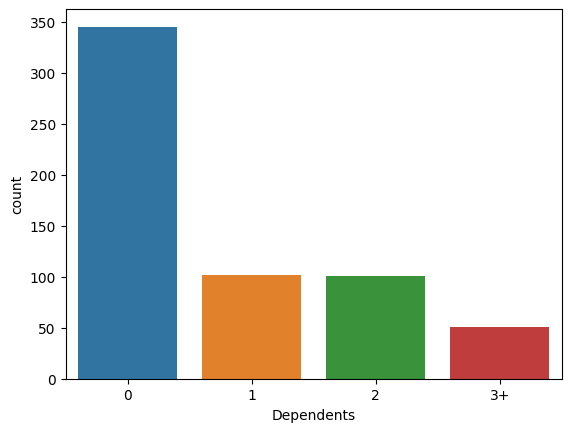

In [10]:
sns.countplot(x='Dependents',data=df)

In [11]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

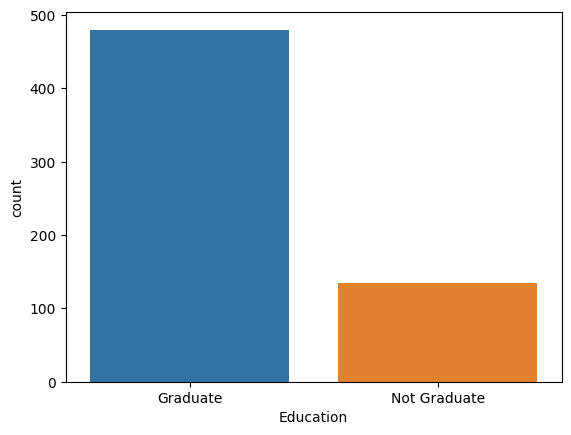

In [12]:
sns.countplot(x='Education',data=df)

In [13]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

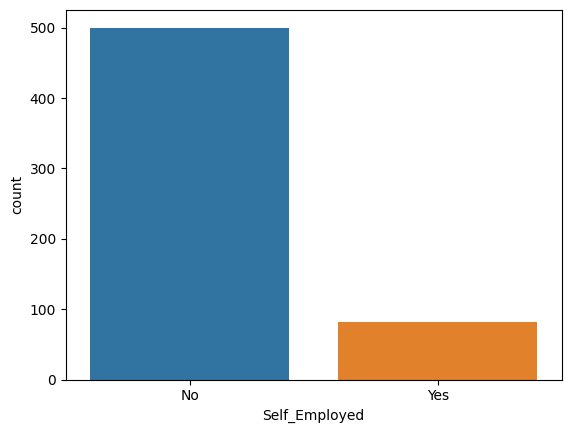

In [14]:
sns.countplot(x='Self_Employed',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

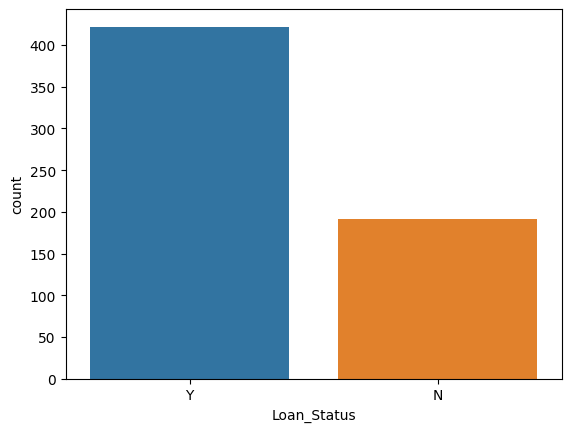

In [15]:
sns.countplot(x='Loan_Status',data=df)

In [73]:
df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

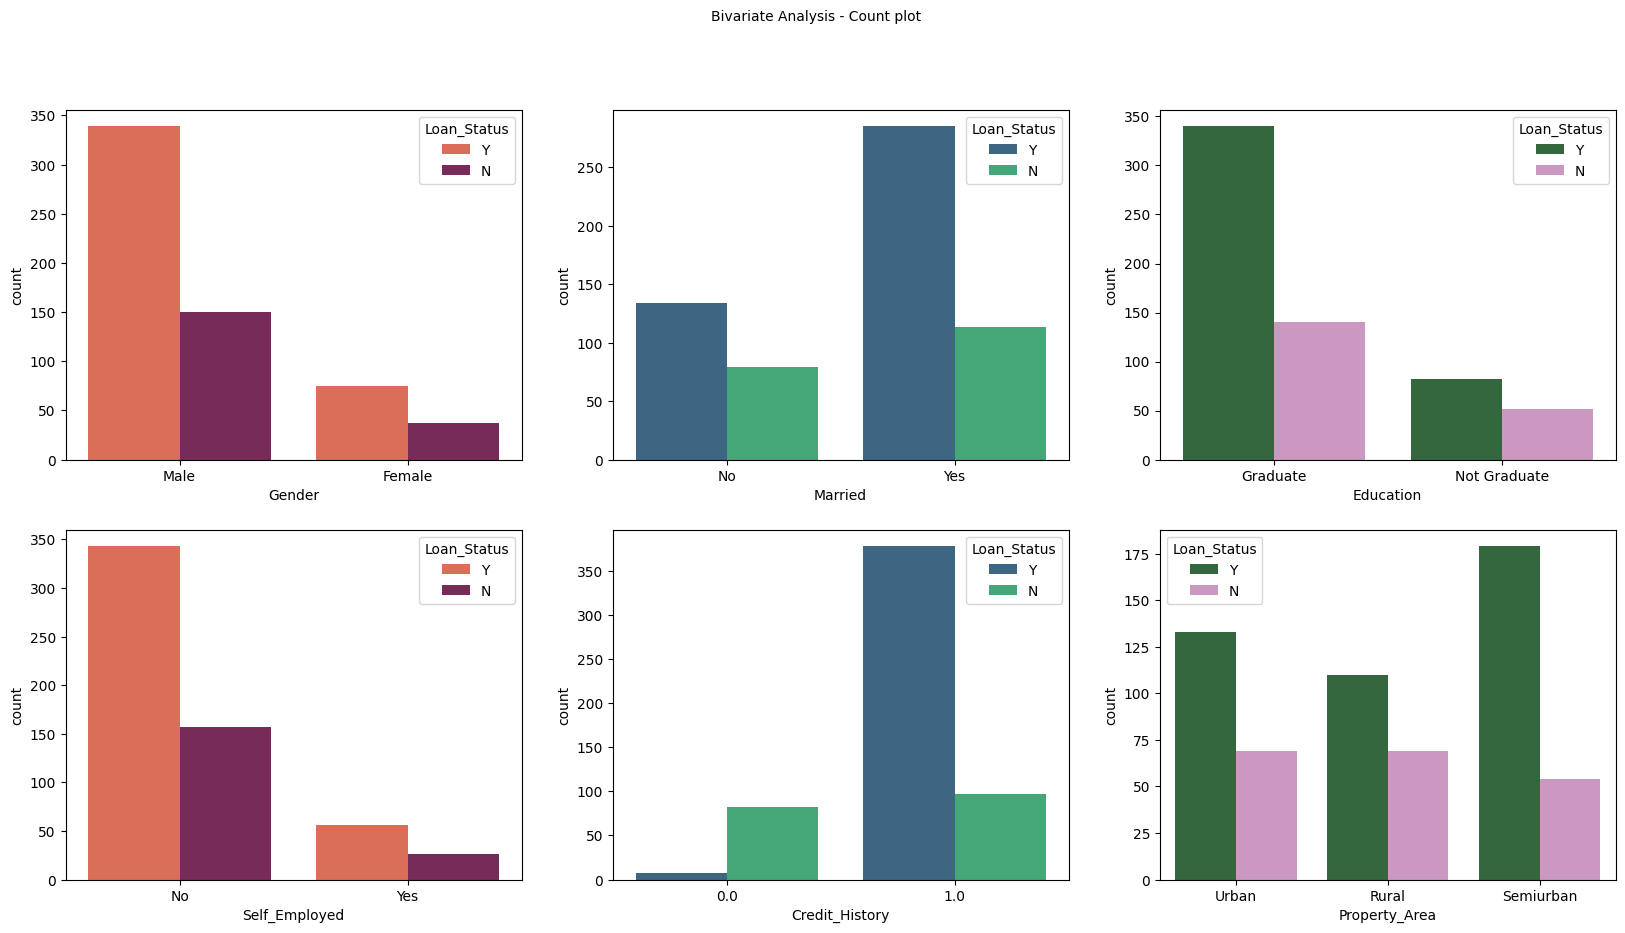

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(232)
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(233)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='cubehelix')

plt.subplot(234)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(235)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(236)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='cubehelix')

plt.suptitle('Bivariate Analysis - Count plot',fontsize = 10)
plt.show()

In [72]:
df['Dependents'].replace("3+","3",inplace=True)

# CHECHING FOR NULL VALUES

In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
# lets drop the Unwanted Columns(LoanID)
df.drop('Loan_ID',axis=1,inplace=True)

In [79]:
# lets fill the null by using fillna method.
df = df.fillna(df.mean().iloc[0])

In [87]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [88]:
# Split the dataset into training and testing sets
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaler=sc.fit_transform(X_train)
X_test_scaler=sc.transform(X_test)

In [91]:
X_train_scaler

array([[-1.58046090e-01, -4.36755577e-02, -1.52315211e-01, ...,
         2.94492056e-01, -6.85711483e-03, -4.69514807e-02],
       [-1.58046090e-01, -4.36755577e-02, -1.52315211e-01, ...,
         2.94492056e-01,  4.47845557e-01, -4.69514807e-02],
       [-1.58046090e-01, -4.36755577e-02, -1.49813816e-01, ...,
         2.94492056e-01,  4.47845557e-01, -4.69514807e-02],
       ...,
       [-1.59244805e-01, -4.77810169e-02, -1.52315211e-01, ...,
         2.94492056e-01,  4.47845557e-01,  1.23378058e+00],
       [-1.59244805e-01,  2.21359005e+01,  6.60577740e+00, ...,
        -1.50172657e+00,  4.47845557e-01, -4.69514807e-02],
       [-1.58046090e-01, -4.36755577e-02,  6.60577740e+00, ...,
         2.94492056e-01,  4.47845557e-01,  1.23378058e+00]])

In [93]:
X_test_scaler

array([[-0.15804609, -0.04367556, -0.15231521, ...,  0.29449206,
         0.44784556, -0.04695148],
       [-0.15804609, -0.04367556, -0.15231521, ...,  0.29449206,
        -0.00685711, -0.04695148],
       [-0.15804609, -0.04367556, -0.14981382, ...,  0.29449206,
         0.44784556, -1.32768354],
       ...,
       [-0.15804609, -0.04367556, -0.15106451, ...,  2.09071068,
         0.44784556, -0.04695148],
       [-0.15804609, -0.04367556, -0.14981382, ...,  0.29449206,
         0.44784556,  1.23378058],
       [-0.15804609, -0.04367556, -0.15231521, ..., -2.39983588,
         0.44784556,  1.23378058]])

In [94]:
# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 76.42276422764228


In [33]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)